## For Assignment 2 you should design your own investigation into the citibike data.
### Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
### At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- ### Choose the significance threshold
- ### Clearly state they Null and Alternate hypothesis
- ### Wrangle the data so that it is ready for your analysis.

In [1]:
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

In [2]:
from __future__  import print_function
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
os.getenv('PUIDATA')

'/home/cusp/vjs306/PUIdata'

In [4]:
datestring = '201510'

In [5]:
#download the zip file of specified datestring into pwd
os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
#move zip file to PUIdata
os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

#unzip zip file... AND move to PUIData
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip" 
          + " -d " + os.getenv("PUIDATA"))

0

In [6]:
#creating the pandas dataframe to store all of the citibike data
cBdata = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
cBdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973.0,1
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990.0,1
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984.0,1
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984.0,1
4,528,10/1/2015 00:00:17,10/1/2015 00:09:05,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,16246,Customer,NaN,0


## IDEA:
## Female riders are more likely to be younger than male riders 

## NULL HYPHOTESIS:
### Over the span of one month, the average age of female riders will be equal to or higher than the average age of male riders


# _$H_0$_ :  $F_m >= M_m$
# _$H_1$_ :  $F_m < M_m$

## Significance level  $\alpha=0.05$

In [7]:
# dropping columns
cBdata.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype'], axis=1, inplace=True)

In [8]:
cBdata['age'] = 2017 - cBdata['birth year']
cBdata.head()

,birth year,gender,age
0,1973.0,1,44.0
1,1990.0,1,27.0
2,1984.0,1,33.0
3,1984.0,1,33.0
4,NaN,0,NaN


In [9]:
cBdata.head()

,birth year,gender,age
0,1973.0,1,44.0
1,1990.0,1,27.0
2,1984.0,1,33.0
3,1984.0,1,33.0
4,NaN,0,NaN


In [10]:
%pylab inline

gen_count = cBdata['gender'].value_counts()

#extract by age and gender and group by age
fem_count = (cBdata['age'][cBdata['gender'] == 2].groupby(cBdata['age']).count())/gen_count[2]
male_count = (cBdata['age'][cBdata['gender'] == 1].groupby(cBdata['age']).count())/gen_count[1]




Populating the interactive namespace from numpy and matplotlib


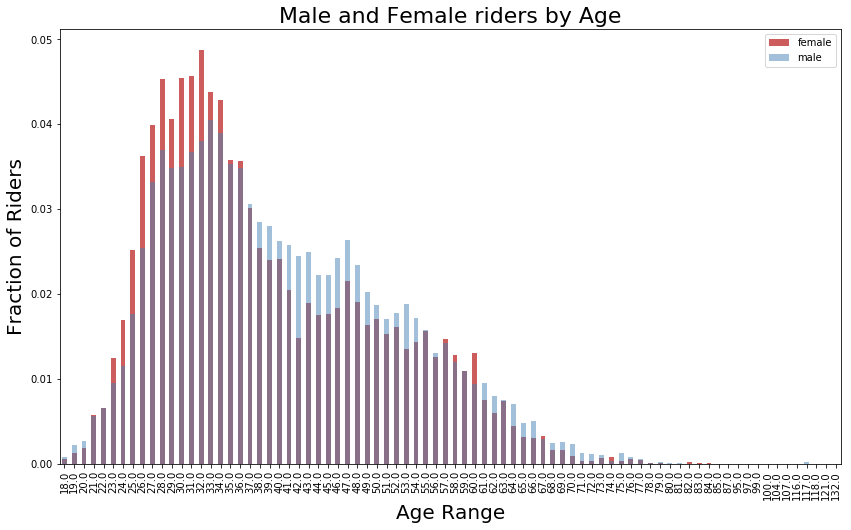

In [11]:
fig = pl.figure(figsize(14,8))

fem_count.plot(kind="bar",  color='IndianRed', label='female')
male_count.plot(kind="bar",  color='SteelBlue', alpha=0.5, label='male')

pl.title('Male and Female riders by Age', fontsize=22)
pl.xlabel('Age Range', fontsize=20)
pl.ylabel('Fraction of Riders', fontsize=20)
pl.legend();

### Figure 1: The above figure contains the distribution of the sample for Female and Male according to their ages. This is normalized

In [12]:
cBavg = cBdata.groupby('gender', as_index=False).age.mean()
cBavg = cBavg.drop(cBavg.index[0])
cBavg

,gender,age
1,1,40.398790
2,2,38.738415


In [13]:
cBavg['gender'][1] = 'Male'
cBavg['gender'][2] = 'Female'


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

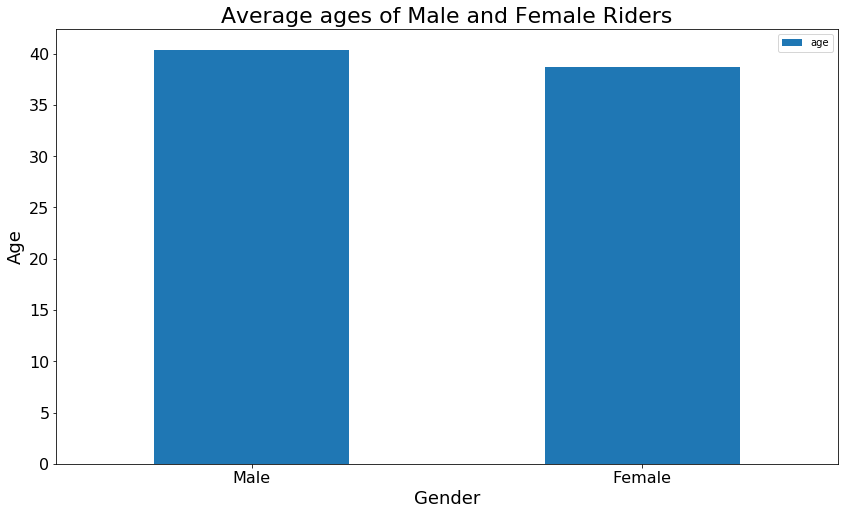

In [14]:
cBavg.plot.bar(x = 'gender',y = 'age', fontsize = 16, rot = 0)
#fig = pl.figure(figsize(14,8))
pl.title('Average ages of Male and Female Riders', fontsize = 22)
pl.ylabel('Age', fontsize = 18)
pl.xlabel('Gender', fontsize = 18)

### Figure 2: The above figure we can see the average Age for Male riders is higher than the average age for Female riders